In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_point
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import random
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz


In [ ]:
df1 = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = df1.drop(['gender', 'PhoneService', 'TotalCharges'], axis=1)
df

customerID  SeniorCitizen Partner Dependents  tenure     MultipleLines  \
0     7590-VHVEG              0     Yes         No       1  No phone service   
1     5575-GNVDE              0      No         No      34                No   
2     3668-QPYBK              0      No         No       2                No   
3     7795-CFOCW              0      No         No      45  No phone service   
4     9237-HQITU              0      No         No       2                No   
...          ...            ...     ...        ...     ...               ...   
7038  6840-RESVB              0     Yes        Yes      24               Yes   
7039  2234-XADUH              0     Yes        Yes      72               Yes   
7040  4801-JZAZL              0     Yes        Yes      11  No phone service   
7041  8361-LTMKD              1     Yes         No       4               Yes   
7042  3186-AJIEK              0      No         No      66                No   

     InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0                DSL             No          Yes               No          No   
1                DSL            Yes           No              Yes          No   
2                DSL            Yes          Yes               No          No   
3                DSL            Yes           No              Yes         Yes   
4        Fiber optic             No           No               No          No   
...              ...            ...          ...              ...         ...   
7038             DSL            Yes           No              Yes         Yes   
7039     Fiber optic             No          Yes              Yes          No   
7040             DSL            Yes           No               No          No   
7041     Fiber optic             No           No               No          No   
7042     Fiber optic            Yes           No              Yes         Yes   

     StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No              No  Month-to-month              Yes   
1             No              No        One year               No   
2             No              No  Month-to-month              Yes   
3             No              No        One year               No   
4             No              No  Month-to-month              Yes   
...          ...             ...             ...              ...   
7038         Yes             Yes        One year              Yes   
7039         Yes             Yes        One year              Yes   
7040          No              No  Month-to-month              Yes   
7041          No              No  Month-to-month              Yes   
7042         Yes             Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges Churn  
0              Electronic check           29.85    No  
1                  Mailed check           56.95    No  
2                  Mailed check           53.85   Yes  
3     Bank transfer (automatic)           42.30    No  
4              Electronic check           70.70   Yes  
...                         ...             ...   ...  
7038               Mailed check           84.80    No  
7039    Credit card (automatic)          103.20    No  
7040           Electronic check           29.60    No  
7041               Mailed check           74.40   Yes  
7042  Bank transfer (automatic)          105.65    No  

[7043 rows x 18 columns]

In [ ]:
y = df["Churn"]
enc = LabelEncoder()
y = enc.fit_transform(y)
df["Churn"]=enc.fit_transform(df["Churn"])
data = df.iloc[:, 1:-1]


In [ ]:
c = (data.dtypes == "object")
catcol = list(c[c].index)
c

SeniorCitizen       False
Partner              True
Dependents           True
tenure              False
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
Contract             True
PaperlessBilling     True
PaymentMethod        True
MonthlyCharges      False
dtype: bool

In [ ]:
for col in catcol:
  data[col] = enc.fit_transform(data[col])
data

SeniorCitizen  Partner  Dependents  tenure  MultipleLines  \
0                 0        1           0       1              1   
1                 0        0           0      34              0   
2                 0        0           0       2              0   
3                 0        0           0      45              1   
4                 0        0           0       2              0   
...             ...      ...         ...     ...            ...   
7038              0        1           1      24              2   
7039              0        1           1      72              2   
7040              0        1           1      11              1   
7041              1        1           0       4              2   
7042              0        0           0      66              0   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                   0               0             2                 0   
1                   0               2             0                 2   
2                   0               2             2                 0   
3                   0               2             0                 2   
4                   1               0             0                 0   
...               ...             ...           ...               ...   
7038                0               2             0                 2   
7039                1               0             2                 2   
7040                0               2             0                 0   
7041                1               0             0                 0   
7042                1               2             0                 2   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0               0            0                0         0                 1   
1               0            0                0         1                 0   
2               0            0                0         0                 1   
3               2            0                0         1                 0   
4               0            0                0         0                 1   
...           ...          ...              ...       ...               ...   
7038            2            2                2         1                 1   
7039            0            2                2         1                 1   
7040            0            0                0         0                 1   
7041            0            0                0         0                 1   
7042            2            2                2         2                 1   

      PaymentMethod  MonthlyCharges  
0                 2           29.85  
1                 3           56.95  
2                 3           53.85  
3                 0           42.30  
4                 2           70.70  
...             ...             ...  
7038              3           84.80  
7039              1          103.20  
7040              2           29.60  
7041              3           74.40  
7042              0          105.65  

[7043 rows x 16 columns]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


split train and test

train

In [ ]:
X = data
target = df["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.05, random_state = 42)

Decision Tree

In [ ]:
DecModel = DecisionTreeClassifier()
DecModel.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
DecPreds = DecModel.predict(X_test)
AccDC=accuracy_score(DecPreds, y_test)
AccDC

0.7110481586402266

In [ ]:
pd.DataFrame(DecPreds)

0
0    0
1    0
2    0
3    1
4    0
..  ..
348  0
349  0
350  0
351  0
352  0

[353 rows x 1 columns]

In [ ]:
DecModel2 = DecisionTreeClassifier()
DecModel2.fit(X_test, y_test)


DecisionTreeClassifier()

In [ ]:
data

SeniorCitizen  Partner  Dependents  tenure  MultipleLines  \
0                 0        1           0       1              1   
1                 0        0           0      34              0   
2                 0        0           0       2              0   
3                 0        0           0      45              1   
4                 0        0           0       2              0   
...             ...      ...         ...     ...            ...   
7038              0        1           1      24              2   
7039              0        1           1      72              2   
7040              0        1           1      11              1   
7041              1        1           0       4              2   
7042              0        0           0      66              0   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                   0               0             2                 0   
1                   0               2             0                 2   
2                   0               2             2                 0   
3                   0               2             0                 2   
4                   1               0             0                 0   
...               ...             ...           ...               ...   
7038                0               2             0                 2   
7039                1               0             2                 2   
7040                0               2             0                 0   
7041                1               0             0                 0   
7042                1               2             0                 2   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0               0            0                0         0                 1   
1               0            0                0         1                 0   
2               0            0                0         0                 1   
3               2            0                0         1                 0   
4               0            0                0         0                 1   
...           ...          ...              ...       ...               ...   
7038            2            2                2         1                 1   
7039            0            2                2         1                 1   
7040            0            0                0         0                 1   
7041            0            0                0         0                 1   
7042            2            2                2         2                 1   

      PaymentMethod  MonthlyCharges  
0                 2           29.85  
1                 3           56.95  
2                 3           53.85  
3                 0           42.30  
4                 2           70.70  
...             ...             ...  
7038              3           84.80  
7039              1          103.20  
7040              2           29.60  
7041              3           74.40  
7042              0          105.65  

[7043 rows x 16 columns]

In [ ]:
dot_data = export_graphviz(DecModel, out_file=None, filled=True, rounded=True, special_characters=True, feature_names=list(['SeniorCitizen',"Partner",'tenure', "Dependents", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod",'MonthlyCharges']))
graph = graphviz.Source(dot_data)
graph.render("telco_tree_dropped")
graph

In [ ]:
df_output=pd.DataFrame(DecPreds)
class_names=df_output[0].to_string()
#df_output[0].unique()

In [ ]:
fig = plt.figure(figsize=(360,240))
_ = tree.plot_tree(DecModel2,
                   feature_names=X_test.columns,
                   class_names=class_names,
                   filled=True)
plt.savefig('out.pdf')

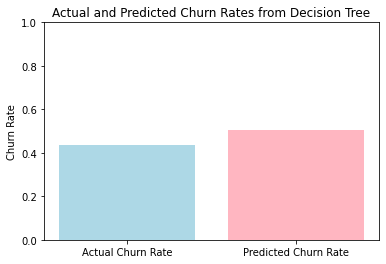

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, DecPreds)
actual_churn_rate1 = cm[1, 1] / (cm[1, 1] + cm[0, 1])
predicted_churn_rate1 = cm[1, 1] / (cm[1, 1] + cm[1, 0])

# Create a bar chart of the predicted and actual churn rates
labels2 = ['Actual Churn Rate', 'Predicted Churn Rate']
values2 = [actual_churn_rate1, predicted_churn_rate1]
colors2 = ['lightblue', 'lightpink']

plt.bar(labels2, values2, color=colors2)
plt.title('Actual and Predicted Churn Rates from Decision Tree')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)
plt.show()

In [ ]:
importances = DecModel.feature_importances_

In [ ]:
indices = importances.argsort()[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. MonthlyCharges (0.311202)
2. tenure (0.197378)
3. Contract (0.170356)
4. PaymentMethod (0.053705)
5. OnlineSecurity (0.045959)
6. InternetService (0.028381)
7. Partner (0.027611)
8. SeniorCitizen (0.022569)
9. PaperlessBilling (0.021825)
10. Dependents (0.020914)
11. DeviceProtection (0.020124)
12. StreamingMovies (0.018330)
13. MultipleLines (0.018304)
14. OnlineBackup (0.016820)
15. TechSupport (0.015116)
16. StreamingTV (0.011408)


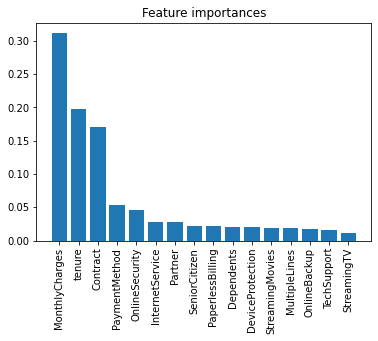

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

In [ ]:
importances2 = pd.DataFrame({'Feature': X_train.columns, 'Importance': DecModel.feature_importances_})
importances2 = importances2.sort_values('Importance', ascending=False)
print(importances2)

             Feature  Importance
15    MonthlyCharges    0.311202
3             tenure    0.197378
12          Contract    0.170356
14     PaymentMethod    0.053705
6     OnlineSecurity    0.045959
5    InternetService    0.028381
1            Partner    0.027611
0      SeniorCitizen    0.022569
13  PaperlessBilling    0.021825
2         Dependents    0.020914
8   DeviceProtection    0.020124
11   StreamingMovies    0.018330
4      MultipleLines    0.018304
7       OnlineBackup    0.016820
9        TechSupport    0.015116
10       StreamingTV    0.011408


In [ ]:
potential_churned_dtc = df[df['Churn'] == 1][DecModel.predict(X[df['Churn'] == 1]) == 1]
print("Potential churned customers using decision tree:\n", potential_churned_dtc)

Potential churned customers using decision tree:
       customerID  SeniorCitizen Partner Dependents  tenure MultipleLines  \
2     3668-QPYBK              0      No         No       2            No   
4     9237-HQITU              0      No         No       2            No   
5     9305-CDSKC              0      No         No       8           Yes   
8     7892-POOKP              0     Yes         No      28           Yes   
13    0280-XJGEX              0      No         No      49           Yes   
...          ...            ...     ...        ...     ...           ...   
7021  1699-HPSBG              0      No         No      12            No   
7026  8775-CEBBJ              0      No         No       9            No   
7032  6894-LFHLY              1      No         No       1           Yes   
7034  0639-TSIQW              0      No         No      67           Yes   
7041  8361-LTMKD              1     Yes         No       4           Yes   

     InternetService OnlineSecurity O

K-Fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
cv = KFold(n_splits=100,random_state=42, shuffle=True)

In [ ]:
scores = cross_val_score(DecModel, X, y, cv=100)
scores
scores.mean()

0.727790744466801

Confusion matrix

In [ ]:
from sklearn import metrics

In [ ]:
confusion_matrix=metrics.confusion_matrix(DecPreds,y_test)
confusion_matrix

array([[206,  44],
       [ 58,  45]])

AUC


In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.datasets import make_classification

In [ ]:
y_pred_proba = DecModel.predict_proba(X_test)[:, 1]

In [ ]:
auc_score = roc_auc_score(y_test, y_pred_proba)
auc_score
# the AUC can be computed by first obtaining the predicted probabilities for each class, and then computing the AUC using these probabilities and the true labels.

0.6473442288049029

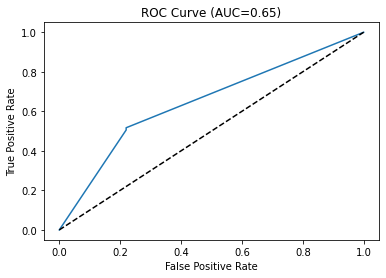

In [ ]:
# compute the FPR, TPR, and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC={auc_score:.2f})')
plt.show()